In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

##module for handling analysis grid
import pyproj
from grid import Grid

##modules that get state_variable from model output
#from models import topaz , nextsim

##utility functions to handle basic io for state variables
from assim_tools.state import *

import config as c

In [2]:
##name of the state variable bin file
binfile = '/cluster/work/users/yingyue/exp1/analysis/200701020000/post_state.bin'

In [3]:
info = read_field_info(binfile)

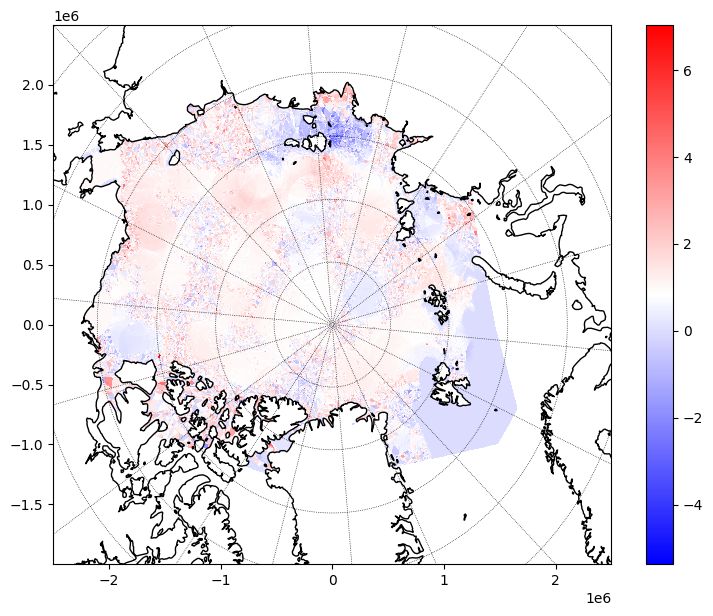

In [7]:
##check field from binfile
fid = [i for i,r in info['fields'].items() if r['name']=='seaice_conc' and r['member']==10 and r['k']==0][0]

fld = read_field(binfile, info, c.mask, fid)

fig, ax = plt.subplots(1, 1, figsize=(9,7))
im = c.grid.plot_field(ax, fld[:], cmap='bwr')
plt.colorbar(im)
c.grid.plot_land(ax)

In [4]:
ii, jj = np.meshgrid(np.arange(c.nx), np.arange(c.ny))
inds = jj*c.nx + ii
inds = inds[~c.mask]

In [5]:
local_inds = inds[100000:110000]

In [6]:
local_state = read_local_state(binfile, info, c.mask, local_inds)

In [18]:
local_state

{'state': array([[[-2.76356097e-03, -2.63116695e-03, -2.61954241e-03, ...,
           5.34704281e-03,  5.87355904e-03,  6.01710659e-03],
         [ 1.04609141e-02,  1.00979004e-02,  1.01823276e-02, ...,
          -3.16441222e-03, -3.76365962e-03, -4.45382018e-03],
         [ 9.88734782e-01,  1.00000000e+00,  1.00000000e+00, ...,
           9.99494314e-01,  9.99771714e-01,  9.99809682e-01],
         ...,
         [ 2.66395836e+01,  2.66866226e+01,  2.67687569e+01, ...,
           2.86988029e+01,  2.86309605e+01,  2.85597839e+01],
         [ 2.66390057e+01,  2.66860390e+01,  2.67295971e+01, ...,
           2.87004089e+01,  2.86326122e+01,  2.85614815e+01],
         [ 2.66392441e+01,  2.66862469e+01,  2.67298622e+01, ...,
           2.87039680e+01,  2.86364269e+01,  2.85657902e+01]],
 
        [[-2.35623168e-03, -2.59772013e-03, -3.07681994e-03, ...,
           9.65821499e-04,  2.37698478e-04, -3.12728953e-04],
         [ 1.79011244e-02,  1.78822018e-02,  1.79994982e-02, ...,
          -6

In [20]:
local_state['state'].shape, len(local_state['name']), local_state['z'].shape

((32, 204, 10000), 204, (32, 204, 10000))

In [23]:
write_local_state(binfile, info, c.mask, local_inds, local_state)

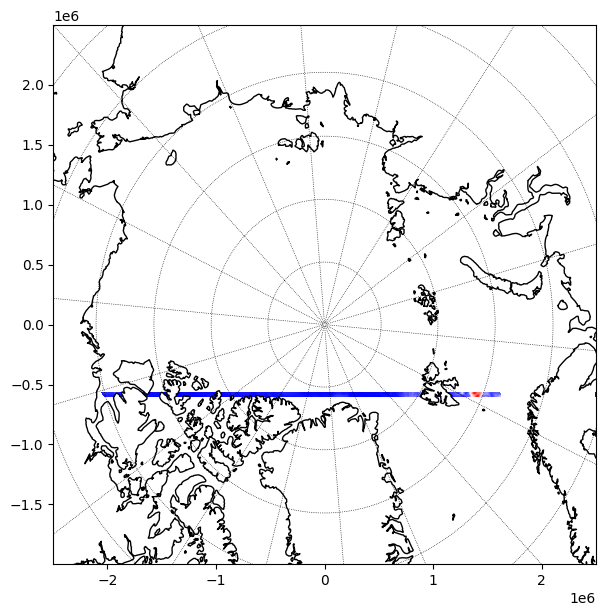

In [11]:
fullstate = np.full((c.ny*c.nx), np.nan)
fullstate[local_inds] = np.std(local_state['state'][:, 10, :], axis=0)

fig, ax = plt.subplots(1, 1, figsize=(7,7))
c.grid.plot_field(ax, fullstate.reshape(c.grid.x.shape), cmap='bwr')
c.grid.plot_land(ax)